In [11]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (2).csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [13]:
df = pd.read_csv("data.csv")

print("First 5 rows:")
print(df.head())

print("\nColumns in dataset:")
print(df.columns)


First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_wor

In [14]:
if "id" in df.columns:
    df = df.drop("id", axis=1)

if "Unnamed: 32" in df.columns:
    df = df.drop("Unnamed: 32", axis=1)

In [15]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training Logistic Regression Model

In [18]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [19]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [20]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[70  1]
 [ 2 41]]


In [21]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [22]:
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.99737962659679


ROC Curve

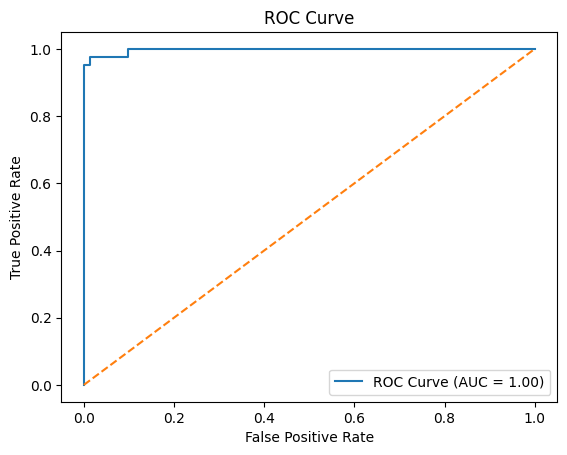

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [24]:
custom_threshold = 0.3
y_custom_pred = (y_prob >= custom_threshold).astype(int)

print("\nConfusion Matrix with Threshold =", custom_threshold)
print(confusion_matrix(y_test, y_custom_pred))


Confusion Matrix with Threshold = 0.3
[[67  4]
 [ 1 42]]


In [25]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)
print(feature_importance.head(10))


                 Feature  Coefficient
21         texture_worst     1.350606
10             radius_se     1.268178
28        symmetry_worst     1.208200
7    concave points_mean     1.119804
26       concavity_worst     0.943053
13               area_se     0.907186
20          radius_worst     0.879840
23            area_worst     0.841846
6         concavity_mean     0.801458
27  concave points_worst     0.778217


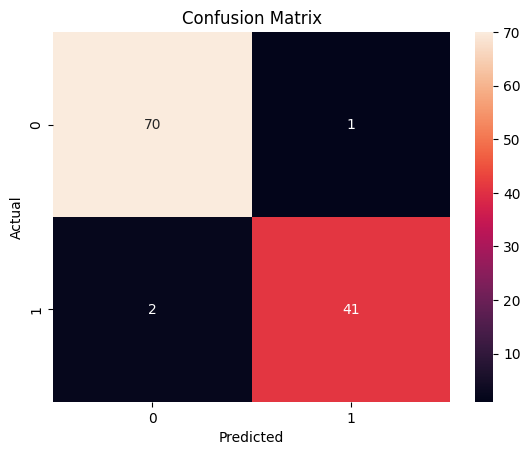

In [26]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation Accuracy:", scores)
print("Mean Accuracy:", scores.mean())


Cross Validation Accuracy: [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]
Mean Accuracy: 0.9507995652848935


Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 0.1, 'solver': 'liblinear'}


Add Model Accuracy

In [31]:
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.9736842105263158


Conclusion:


1.   Built a logistic regression model to predict whether a tumor is benign or malignant.
2.   Cleaned and standardized the data before training the model.
3.   ROC-AUC score confirms that the model has strong classification ability for this binary problem.
4.   Overall, the model performs well for this binary classification task.


